# CIFAR 10 Example

## Folder Structure

In [1]:
import os 
CIFAR10_DATASET_PATH = os.path.join('./data/cifar10')

# Libraries

In [2]:
import torch, torchvision

## Configuration

In [3]:
# Configuration 

n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)



In [4]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

## Dataloader

In [5]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10(CIFAR10_DATASET_PATH, train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10(CIFAR10_DATASET_PATH, train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                             ])),
  batch_size=batch_size_test, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [7]:
example_data.shape

torch.Size([1000, 3, 32, 32])

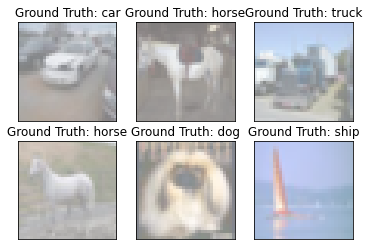

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(train_loader)
images, labels = dataiter.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    img = torchvision.utils.make_grid(images[i])
    imshow(img)
    plt.title("Ground Truth: {}".format(classes[labels[i]]))
    plt.xticks([])
    plt.yticks([])